# 1 - Pre-Processing

### a - Importation des fichier

In [149]:
import pandas as pd

raw_x_train_df = pd.read_csv("x_train_T9QMMVq.csv")
raw_y_train_df = pd.read_csv("y_train_R0MqWmu.csv")
raw_x_test_df = pd.read_csv("x_test_9F13O5s.csv")

print(raw_x_train_df.info())
print(raw_y_train_df.info())
print(raw_x_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202933 entries, 0 to 202932
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        202933 non-null  int64  
 1   Humidity  202933 non-null  float64
 2   M12       202933 non-null  float64
 3   M13       202933 non-null  float64
 4   M14       202933 non-null  float64
 5   M15       202933 non-null  float64
 6   M4        202933 non-null  float64
 7   M5        202933 non-null  float64
 8   M6        202933 non-null  float64
 9   M7        202933 non-null  float64
 10  R         202933 non-null  float64
 11  S1        202933 non-null  float64
 12  S2        202933 non-null  float64
 13  S3        202933 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 21.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202933 entries, 0 to 202932
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   

In [150]:
import numpy as np

def count_non_null(df):
    column_list = df.columns
    columns_count = {}
    for c in column_list:
        columns_count[c] = 0
    for index, row in df.iterrows():
        for c in column_list:
            if np.abs(row[c]) > 0.05:
                columns_count[c] += 1
    return columns_count

print("décompte des non nulles y_train :", count_non_null(raw_y_train_df))
print("décompte des non nulles x_train :", count_non_null(raw_x_train_df))
print("décompte des non nulles x_test :", count_non_null(raw_x_test_df))

décompte des non nulles y_train : {'ID': 202932, 'c01': 98341, 'c02': 27845, 'c03': 163352, 'c04': 163352, 'c05': 10047, 'c06': 10047, 'c07': 27845, 'c08': 1906, 'c09': 4835, 'c10': 25939, 'c11': 22155, 'c12': 37892, 'c13': 27119, 'c14': 36299, 'c15': 0, 'c16': 1066, 'c17': 8020, 'c18': 39887, 'c19': 3967, 'c20': 27845, 'c21': 10047, 'c22': 163352, 'c23': 9231}
décompte des non nulles x_train : {'ID': 202932, 'Humidity': 81809, 'M12': 151812, 'M13': 137092, 'M14': 104649, 'M15': 67588, 'M4': 154682, 'M5': 101559, 'M6': 63754, 'M7': 39846, 'R': 202498, 'S1': 200400, 'S2': 202933, 'S3': 202933}
décompte des non nulles x_test : {'ID': 134673, 'Humidity': 120191, 'M12': 96745, 'M13': 86995, 'M14': 69976, 'M15': 43729, 'M4': 107231, 'M5': 78769, 'M6': 46064, 'M7': 24989, 'R': 134566, 'S1': 132574, 'S2': 134673, 'S3': 134673}


### a- Correlation

On affiche ci dessous la corrélation entre les données

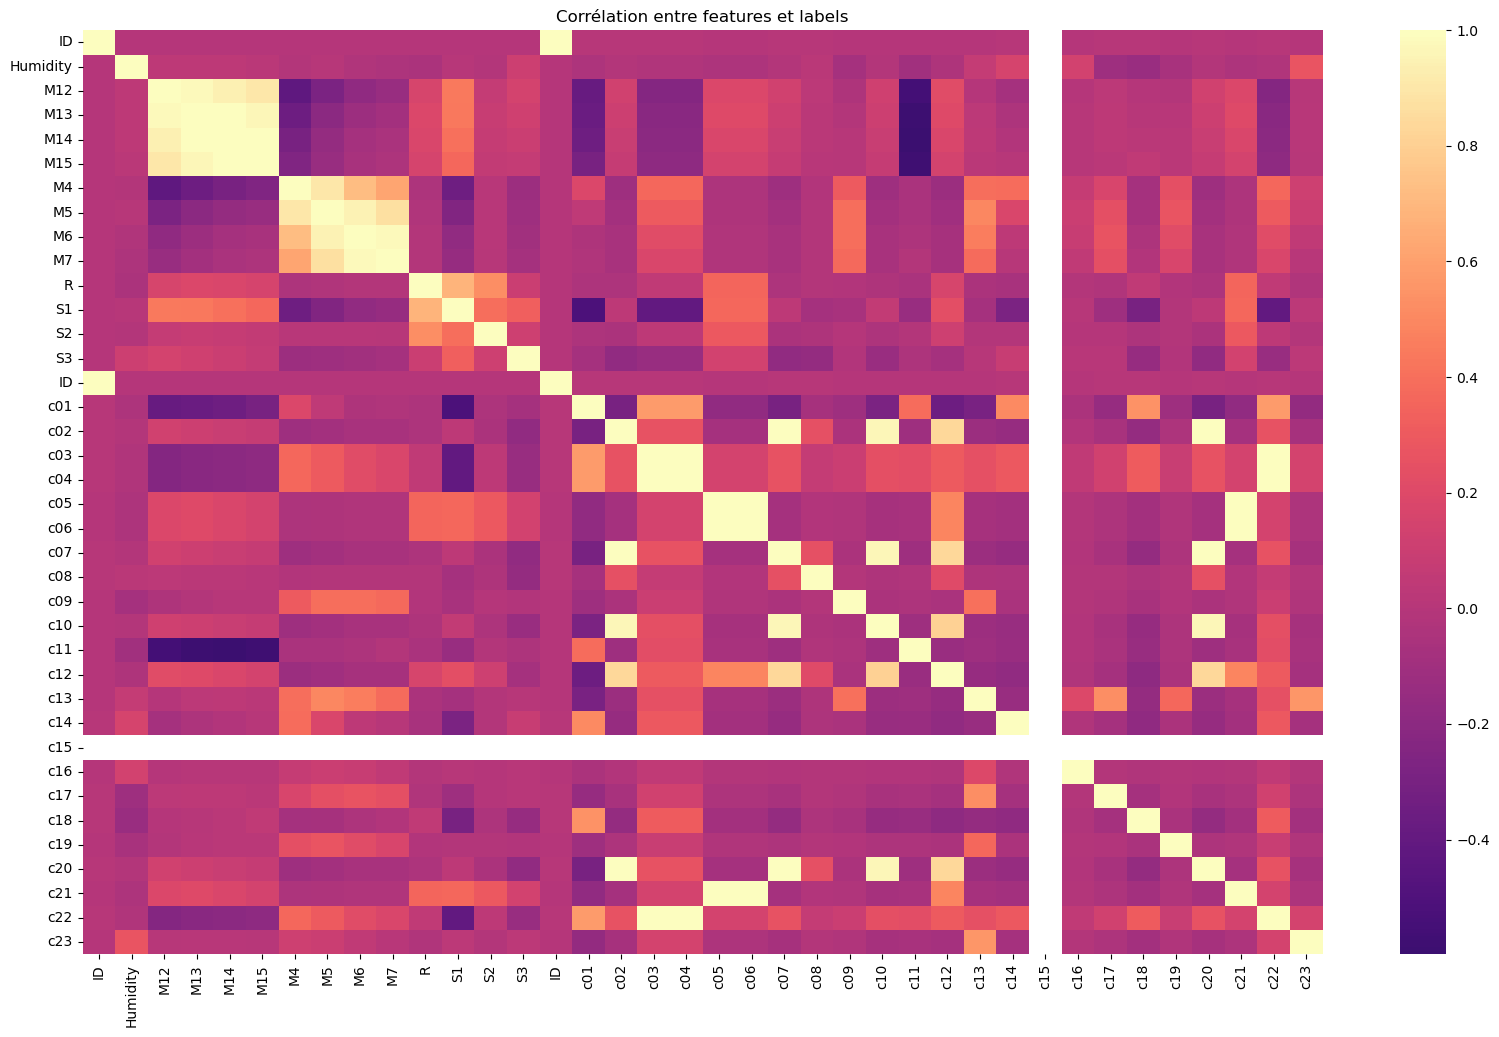

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train = raw_x_train_df[['Humidity', 'M15','M14', 'M13', 'M12', 'M7','M6', 'M5', 'M4', 'R', 'S1', 'S2', 'S3']]
y_train = raw_y_train_df[['c01', 'c02', 'c03', 'c05', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17', 'c18', 'c19', 'c23']]

# Suppose que y_train est un DataFrame avec plusieurs colonnes (y1, y2, y3, ...)
df = pd.concat([raw_x_train_df, raw_y_train_df], axis=1)

# Calcul de la matrice de corrélation
corr = df.corr(numeric_only=True)

# Visualisation
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=False, cmap="magma", center=0)
plt.title("Corrélation entre features et labels")
plt.show()

### b - Distribution des features et des labels

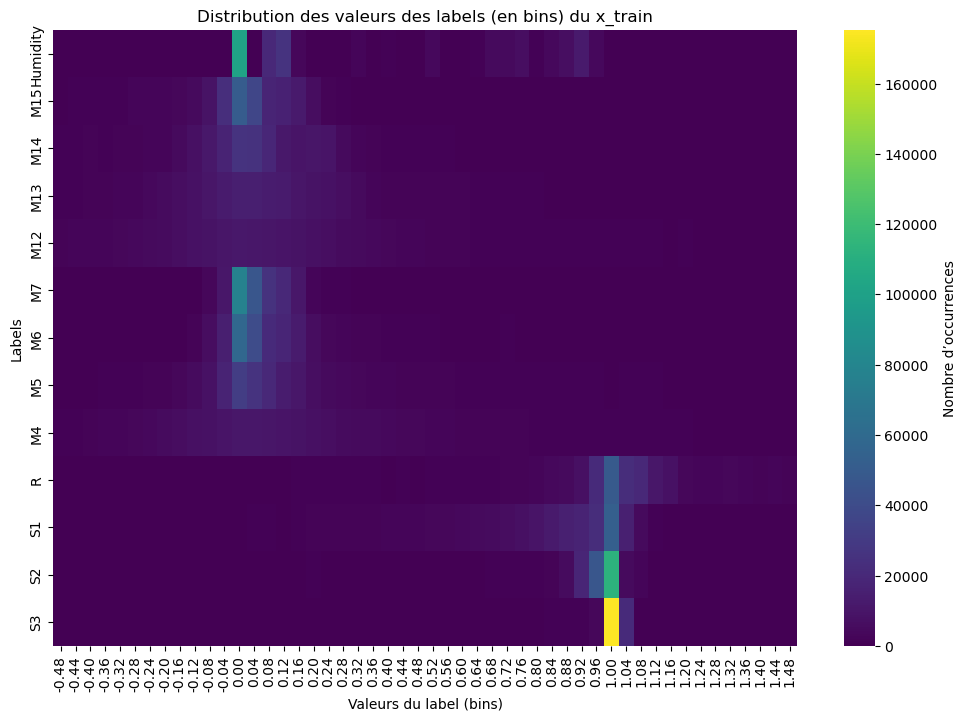

In [144]:
X_train = raw_x_train_df[['Humidity', 'M15','M14', 'M13', 'M12', 'M7','M6', 'M5', 'M4', 'R', 'S1', 'S2', 'S3']]
y_train = raw_y_train_df[['c01', 'c02', 'c03', 'c04', 'c05','c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20','c21', 'c22', 'c23']]

# ---- Paramètres ----
n_bins = 50  # nombre de bins pour les labels

# ---- Calcul du min et max global sur tous les labels ----
bins = np.linspace(-0.5, 1.5, n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# ---- Construction du tableau des comptages ----
dist_matrix = []

for label_name in X_train.columns:
    values = X_train[label_name]
    hist, _ = np.histogram(values, bins=bins)
    dist_matrix.append(hist)

# ---- DataFrame pour heatmap ----
count_df = pd.DataFrame(dist_matrix, columns=[f"{b:.2f}" for b in bin_centers])
count_df.index = X_train.columns

# ---- Heatmap ----
plt.figure(figsize=(12, 8))
sns.heatmap(count_df, cmap="viridis", cbar_kws={'label': 'Nombre d’occurrences'})
plt.xlabel("Valeurs du label (bins)")
plt.ylabel("Labels")
plt.title("Distribution des valeurs des labels (en bins) du x_train")
plt.show()

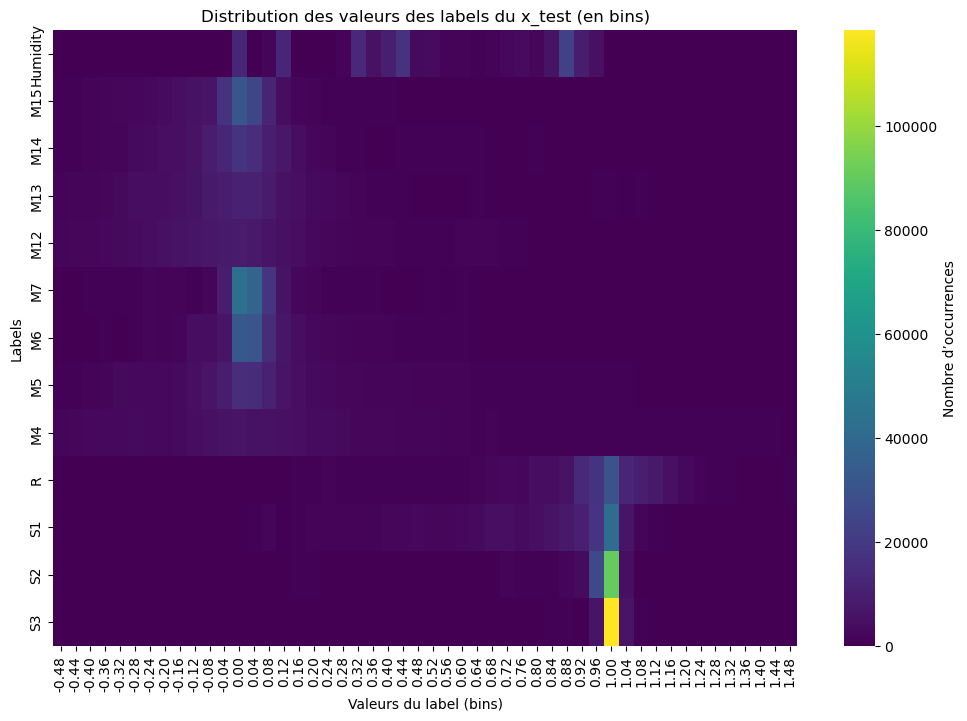

In [143]:
X_train = raw_x_test_df[['Humidity', 'M15','M14', 'M13', 'M12', 'M7','M6', 'M5', 'M4', 'R', 'S1', 'S2', 'S3']]
y_train = raw_y_train_df[['c01', 'c02', 'c03', 'c04', 'c05','c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20','c21', 'c22', 'c23']]

# ---- Paramètres ----
n_bins = 50  # nombre de bins pour les labels

# ---- Calcul du min et max global sur tous les labels ----
bins = np.linspace(-0.5, 1.5, n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# ---- Construction du tableau des comptages ----
dist_matrix = []

for label_name in X_train.columns:
    values = X_train[label_name]
    hist, _ = np.histogram(values, bins=bins)
    dist_matrix.append(hist)

# ---- DataFrame pour heatmap ----
count_df = pd.DataFrame(dist_matrix, columns=[f"{b:.2f}" for b in bin_centers])
count_df.index = X_train.columns

# ---- Heatmap ----
plt.figure(figsize=(12, 8))
sns.heatmap(count_df, cmap="viridis", cbar_kws={'label': 'Nombre d’occurrences'})
plt.xlabel("Valeurs du label (bins)")
plt.ylabel("Labels")
plt.title("Distribution des valeurs des labels du x_test (en bins)")
plt.show()

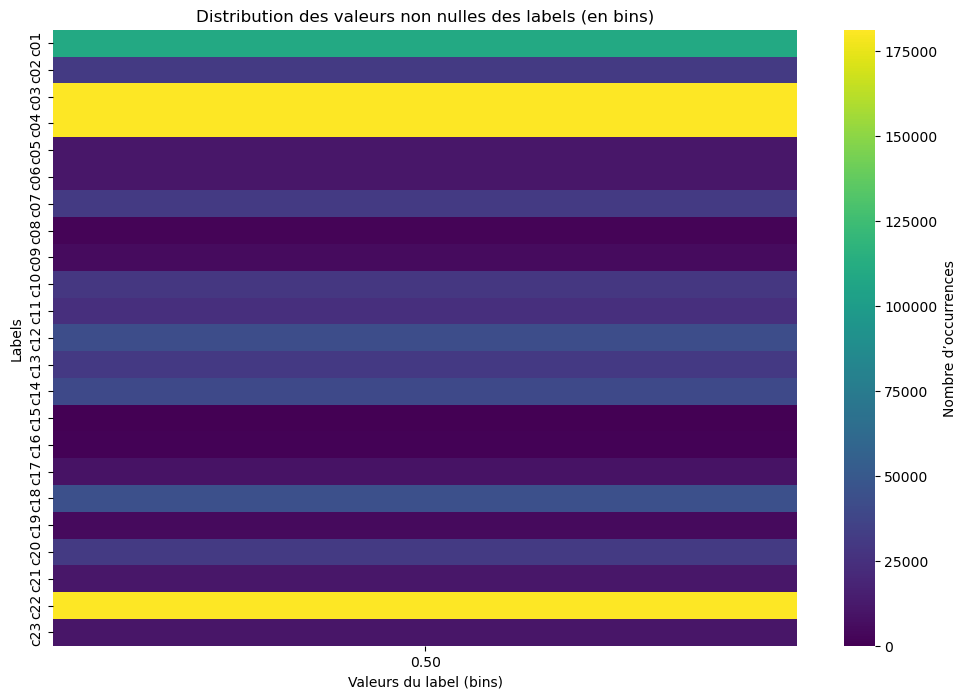

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train = raw_x_train_df
y_train = raw_y_train_df[['c01', 'c02', 'c03', 'c04', 'c05','c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20','c21', 'c22', 'c23']]

# ---- Paramètres ----
n_bins = 1  # nombre de bins pour les labels
threshold = 0.00

# ---- Calcul du min et max global sur tous les labels ----
y_min = y_train.min().min()
y_max = y_train.max().max()
bins = np.linspace(y_min, y_max, n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# ---- Construction du tableau des comptages ----
dist_matrix = []

for label_name in y_train.columns:
    values = y_train[label_name]
    filtered_values = values[values > threshold]
    hist, _ = np.histogram(filtered_values, bins=bins)
    dist_matrix.append(hist)

# ---- DataFrame pour heatmap ----
count_df = pd.DataFrame(dist_matrix, columns=[f"{b:.2f}" for b in bin_centers])
count_df.index = y_train.columns

# ---- Heatmap ----
plt.figure(figsize=(12, 8))
sns.heatmap(count_df, cmap="viridis", cbar_kws={'label': 'Nombre d’occurrences'})
plt.xlabel("Valeurs du label (bins)")
plt.ylabel("Labels")
plt.title("Distribution des valeurs non nulles des labels (en bins)")
plt.show()


### c - La feature "Humidity"

Comparaison de la distribution de l'humidité entre le test et le train

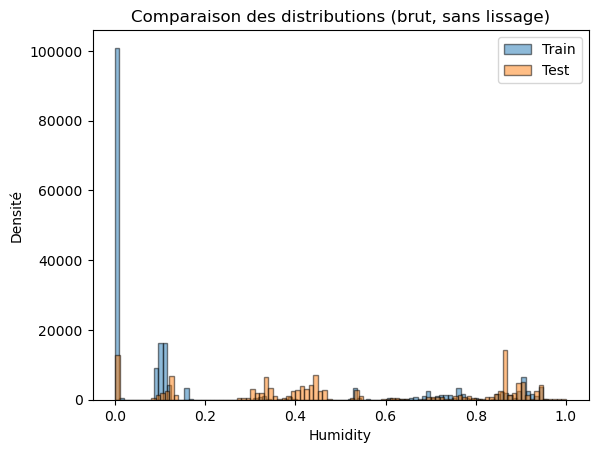

In [21]:
import matplotlib.pyplot as plt

X_train = raw_x_train_df
X_test = raw_x_test_df

plt.hist(
    X_train["Humidity"], 
    bins=100, 
    alpha=0.5, 
    label="Train", 
    density=False,
    edgecolor='k'
)
plt.hist(
    X_test["Humidity"], 
    bins=100, 
    alpha=0.5, 
    label="Test", 
    density=False,
    edgecolor='k'
)
plt.legend()
plt.xlabel("Humidity")
plt.ylabel("Densité")
plt.title("Comparaison des distributions (brut, sans lissage)")
plt.show()


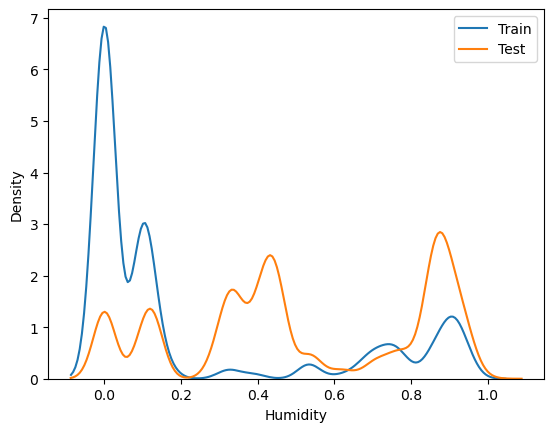

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(raw_x_train_df["Humidity"], label="Train")
sns.kdeplot(raw_x_test_df["Humidity"], label="Test")
plt.legend()
plt.show()

Impact de l'humidité sur chaque label en fonction de sa valeur

/var/folders/yy/tft5xhgn5xvf24qjl55hpstr0000gn/T/ipykernel_55675/162705763.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(humidity_bins)


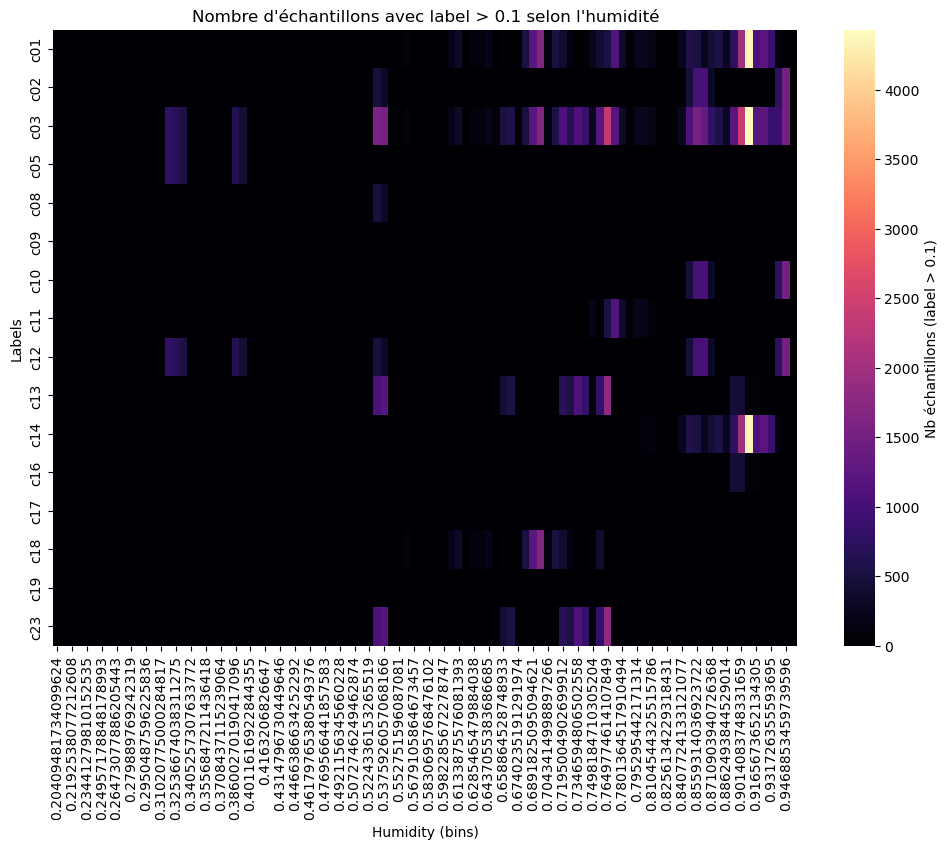

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train = raw_x_train_df
y_train = raw_y_train_df[['c01', 'c02', 'c03', 'c05', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17', 'c18', 'c19', 'c23']]

n_bins = 100
feature = "Humidity"
threshold = 0.1

bins = np.linspace(X_train[feature].min()+0.2, X_train[feature].max(), n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
humidity_bins = pd.cut(X_train[feature], bins=bins, labels=bin_centers, include_lowest=True)

count_per_bin = (
    (y_train > threshold)   
    .groupby(humidity_bins)
    .sum()                 
    .T                     
)

plt.figure(figsize=(12, 8))
sns.heatmap(count_per_bin, cmap="magma", cbar_kws={'label': f"Nb échantillons (label > {threshold})"})
plt.xlabel("Humidity (bins)")
plt.ylabel("Labels")
plt.title(f"Nombre d'échantillons avec label > {threshold} selon l'humidité")
plt.show()


Quantile mapping de l'humidité du train

Taille de X_train[Humidity]: 202933
Taille de X_test[Humidity]: 134673


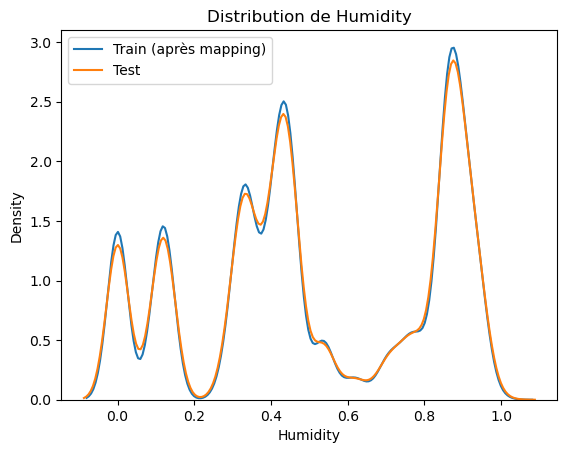

In [ ]:
X_train = raw_x_train_df
X_test = raw_x_test_df

def quantile_mapping(train_series, test_series): 
    test_quantiles = np.linspace(0, 1, len(test_series))
    test_sorted = np.sort(test_series)
    train_sorted = np.sort(train_series)
    train_quantiles = np.linspace(0, 1, len(train_series))
    mapped_values = np.interp(train_quantiles, test_quantiles, test_sorted)
    return mapped_values

feature_name = "Humidity"
mapped_feature_train = quantile_mapping(X_train[feature_name], X_test[feature_name])

X_train_mapped = X_train.copy()
X_train_mapped[feature_name] = mapped_feature_train

sns.kdeplot(X_train_mapped[feature_name], label='Train (après mapping)')
sns.kdeplot(X_test[feature_name], label='Test')
plt.legend()
plt.title(f"Distribution de {feature_name}")
plt.show()

Valeurs possibles d'un label en fonction de l'humidité

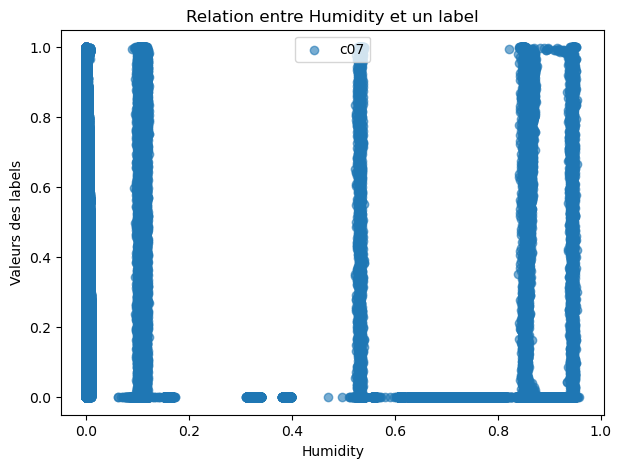

In [157]:
X_train = raw_x_train_df
y_train = raw_y_train_df
feature_name = "Humidity"
col = "c07"

plt.figure(figsize=(7,5))
plt.scatter(X_train[feature_name], y_train[col], label=col, alpha=0.6)
plt.legend()
plt.xlabel(feature_name)
plt.ylabel("Valeurs des labels")
plt.title(f"Relation entre {feature_name} et un label")
plt.show()

### d - Etude d'un label important : la colonne C03 et ses corrélations

/var/folders/yy/tft5xhgn5xvf24qjl55hpstr0000gn/T/ipykernel_55675/3942020050.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = label_values[label_values > threshold].groupby(feature_bins).count()


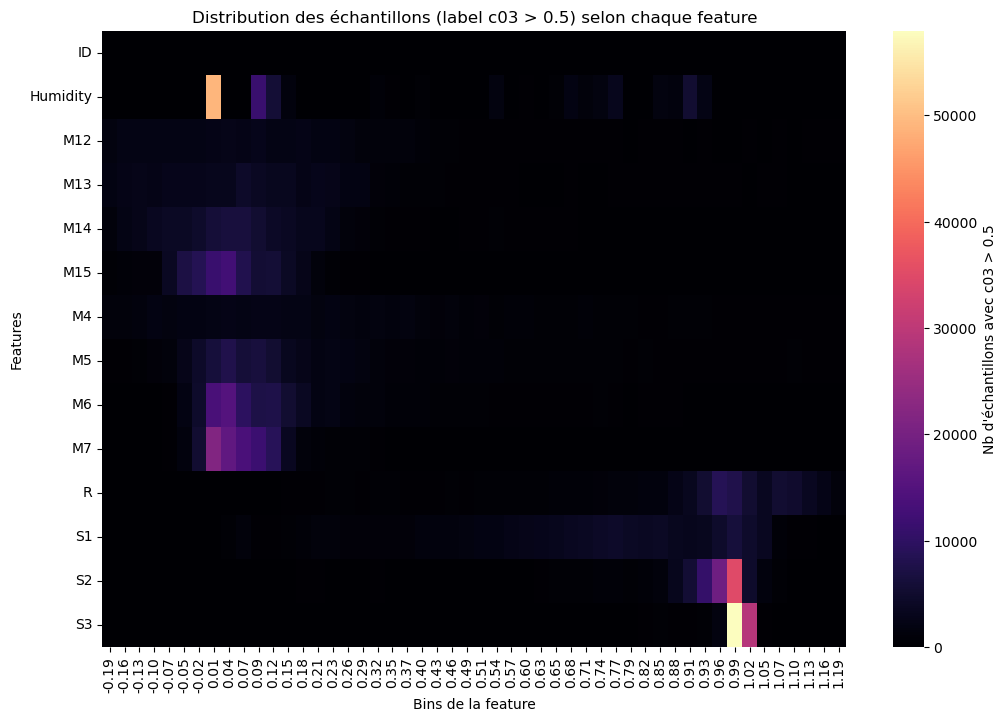

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train = raw_x_train_df
y_train = raw_y_train_df

# ---- Paramètres ----
n_bins = 50
label_name = "c03"
threshold = 0.5

# ---- Extraction du label d'intérêt ----
label_values = y_train[label_name]

# ---- Préparation des structures ----
dist_matrix = []
bin_labels = None  # pour stocker les centres de bins

for feature in X_train.columns:
    values = X_train[feature]

    # Création des bins pour cette feature
    bins = np.linspace(-0.2, 1.2, n_bins + 1)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_labels = [f"{b:.2f}" for b in bin_centers]

    # Association de chaque échantillon à un bin
    feature_bins = pd.cut(values, bins=bins, labels=bin_centers, include_lowest=True)

    # Compter les échantillons dont le label c03 > 0.01 dans chaque bin
    counts = label_values[label_values > threshold].groupby(feature_bins).count()

    # Convertir en tableau de longueur n_bins (remplir les bins vides avec 0)
    counts = counts.reindex(bin_centers, fill_value=0)
    dist_matrix.append(counts.values)

# ---- DataFrame finale pour heatmap ----
heat_df = pd.DataFrame(dist_matrix, columns=bin_labels, index=X_train.columns)

# ---- Plot ----
plt.figure(figsize=(12, 8))
sns.heatmap(heat_df, cmap="magma", cbar_kws={'label': f"Nb d'échantillons avec {label_name} > {threshold}"})
plt.xlabel("Bins de la feature")
plt.ylabel("Features")
plt.title(f"Distribution des échantillons (label {label_name} > {threshold}) selon chaque feature")
plt.show()


# 2 - Creations des modèles 
définition de la fonction de score du data challenge

In [47]:
def bert_metric(y_pred_array, y_true_array):
    y_true_array = np.array(y_true_array)
    y_pred_array = np.array(y_pred_array)
    error = 0
    for i in range(y_pred_array.shape[0]):
        y_pred_row, y_true_row = y_pred_array[i], y_true_array[i]
        error_row = 0
        for j in range(len(y_true_row)):
            if y_true_row[j] < 0.5:
                error_row += (y_pred_row[j] - y_true_row[j])**2
            else:
                error_row += 1.2 * (y_pred_row[j] - y_true_row[j])**2
        error += error_row / len(y_true_row)
    return np.sqrt(error / y_pred_array.shape[0])

Nous créeons ci dessous différents modèles à partir de xgboost et random_forest

### a - boosting sans humidité

Modèle xgb entrainé sans les features "Humidity", "M14", "M13", "M6", "M5". Peu d'estimateurs. En effet, on obtient en testant sur 20% des données locales, le meilleur score pour un très grand nombre d'estimateurs (nous sommes même allé jusqu'à 2000 estimateurs pour obtenir le meilleur score de test). Cependant, le score obtenu en prédisant le x_test sur site du data challenge restait faible. En revanche, il s'est avéré qu'avec seulement 20 estimateurs, il était possible d'obtenir un score inférieur à celui de la benchmark, même si le score local est moins bon

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

list_column = ['c01', 'c02', 'c03', 'c04', 'c05','c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20','c21', 'c22', 'c23']
list_features = ['M15', 'M12', 'M7','M4', 'R', 'S1', 'S2', 'S3']
x_train_df = raw_x_train_df.iloc[:, 1:][list_features]
y_train_df = raw_y_train_df.iloc[:, 1:][list_column]

x_train_val, x_test, y_train_val, y_test = train_test_split(x_train_df, y_train_df, test_size=0.1)

xgb_params = {
    'n_estimators': 20,
    'max_depth': 8,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror'
}

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1)

xgb_model = XGBRegressor(**xgb_params)
model2 = MultiOutputRegressor(xgb_model, n_jobs=-1)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_val)
final_error = bert_metric(y_pred, y_val)
print(f' Score: {final_error}')


 Score: 0.06785250711425964


### b - random forest sans humidité

ces deux modèles sont entrainés sur le même jeu de données que le précédent : on retire les features suivantes : "Humidity", "M14", "M13", "M6", "M5".
rf1 a peu d'estimateur mais un gros sample leaf et un gros sample split : ils doivent normallement beaucoup généraliser malgré leur profondeur de 8. C'est un modèle de cetype qui a obtenu le meilleur score. meilleur score public avec ce type d'arbre : 0.147
rf2 a beaucoup d'estimateurs mais peu de sample leaf et sample split. le faible nombre de sample split lui autorise de créer des ramifications concernant des occurences rares, ce qui pourrait créer de l'overfitting, mais le grand nombre d'itérations lui permet de créer de nombreux arbres différents et donc de  la variété qui permet de généraliser. meilleur score public avec ce type d'arbre : 0.149

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

list_column = ['c01', 'c02', 'c03', 'c04', 'c05','c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20','c21', 'c22', 'c23']
list_features = ['M15', 'M12', 'M7','M4', 'R', 'S1', 'S2', 'S3']
x_train_df = raw_x_train_df[list_features]
y_train_df = raw_y_train_df[list_column]

x_train_val, x_test, y_train_val, y_test = train_test_split(x_train_df, y_train_df, test_size=0.1)

# Paramètres pour RandomForest (ajustables selon vos besoins)
rf_params = {
    'n_estimators': 20,  
    'max_depth': 10,
    'min_samples_split': 5, 
    'min_samples_leaf': 20,
    'max_features': 'sqrt',
    'n_jobs': -1 
}

rf_params2 = {
    'n_estimators': 50,  
    'max_depth': 8,
    'min_samples_split': 5, 
    'min_samples_leaf': 5,
    'max_features': 'sqrt',  # Typique pour RandomForest
    'n_jobs': -1  # Utilise tous les cœurs
}

# Split validation (inchangé)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1)

# Modèle RandomForest avec MultiOutput
rf_model = RandomForestRegressor(**rf_params)
rf_model2 = RandomForestRegressor(**rf_params2)
modelrf1 = MultiOutputRegressor(rf_model, n_jobs=-1)
modelrf2 = MultiOutputRegressor(rf_model2, n_jobs=-1)

modelrf1.fit(x_train, y_train)
modelrf2.fit(x_train, y_train)
y_pred = modelrf1.predict(x_val)
print(f'Score rf1: {bert_metric(y_pred, y_val)}')
y_pred = modelrf2.predict(x_val)
print(f'Score rf2: {bert_metric(y_pred, y_val)}')

Score rf1: 0.08847430871639342
Score rf2: 0.08706125139047104


### c - random forest avec humidité

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

list_column = ['c01', 'c02', 'c03', 'c04', 'c05','c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20','c21', 'c22', 'c23']
list_features = ['Humidity', 'M15', 'M7', 'R', 'S1', 'S2', 'S3']
x_train_df = X_train_mapped[list_features]
y_train_df = raw_y_train_df[list_column]

x_train_val, x_test, y_train_val, y_test = train_test_split(x_train_df, y_train_df, test_size=0.1)

# Paramètres pour RandomForest (ajustables selon vos besoins)
rf_params = {
    'n_estimators': 100,  
    'max_depth': 10,
    'min_samples_split': 10, 
    'min_samples_leaf': 10,
    'max_features': 3, 
    'n_jobs': -1 
}

# Split validation (inchangé)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1)

# Modèle RandomForest avec MultiOutput
rf_modelmatch = RandomForestRegressor(**rf_params)
modelrf_match = MultiOutputRegressor(rf_modelmatch, n_jobs=-1)

modelrf_match.fit(x_train, y_train)
y_pred = modelrf_match.predict(x_val)
print(f'Score model_rf_match: {bert_metric(y_pred, y_val)}')

Score model_rf_match: 0.06214975890667575


### d - random forest avec humidité modifiée

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

list_column = ['c01', 'c02', 'c03', 'c04', 'c05','c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20','c21', 'c22', 'c23']
list_features = ['Humidity', 'M15', 'M7', 'R', 'S1', 'S2', 'S3']
x_train_df = raw_x_train_df[list_features]
y_train_df = raw_y_train_df[list_column]

x_train_val, x_test, y_train_val, y_test = train_test_split(x_train_df, y_train_df, test_size=0.1)

# Paramètres pour RandomForest (ajustables selon vos besoins)
rf_params = {
    'n_estimators': 10,  
    'max_depth': 8,
    'min_samples_split': 5, 
    'min_samples_leaf': 30,
    'max_features': 'sqrt', 
    'n_jobs': -1 
}

# Split validation (inchangé)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1)

# Modèle RandomForest avec MultiOutput
rf_model3 = RandomForestRegressor(**rf_params)
modelrf3 = MultiOutputRegressor(rf_model3, n_jobs=-1)

modelrf3.fit(x_train, y_train)
y_pred = modelrf3.predict(x_val)
print(f'Score rf3: {bert_metric(y_pred, y_val)}')

Score rf3: 0.0840532741781044


# 3 - Predictions

### a - Fonctions de prédictions

In [116]:
def predictor_rf1(input_df):
    id_df = input_df['ID']
    df = input_df[['M15', 'M12', 'M7','M4', 'R', 'S1', 'S2', 'S3']]
    y_pred_final = modelrf1.predict(df)
    y_pred_final = np.where(y_pred_final < 0.05, 0, y_pred_final)
    column_names = [f'c{str(i).zfill(2)}' for i in range(1, 24)]
    y_pred_final_df = pd.DataFrame(y_pred_final, columns=column_names)
    result_df = pd.concat([id_df, y_pred_final_df], axis=1)
    return result_df

def predictor_xgb1(input_df):
    id_df = input_df['ID']
    df = input_df[['M15', 'M12', 'M7','M4', 'R', 'S1', 'S2', 'S3']]
    y_pred_final = model2.predict(df)
    y_pred_final = np.where(y_pred_final < 0.05, 0, y_pred_final)
    column_names = [f'c{str(i).zfill(2)}' for i in range(1, 24)]
    y_pred_final_df = pd.DataFrame(y_pred_final, columns=column_names)
    result_df = pd.concat([id_df, y_pred_final_df], axis=1)
    return result_df

def predictor_rf2(input_df):
    id_df = input_df['ID']
    df = input_df[['M15', 'M12', 'M7','M4', 'R', 'S1', 'S2', 'S3']]
    y_pred_final = modelrf2.predict(df)
    y_pred_final = np.where(y_pred_final < 0.05, 0, y_pred_final)
    column_names = [f'c{str(i).zfill(2)}' for i in range(1, 24)]
    y_pred_final_df = pd.DataFrame(y_pred_final, columns=column_names)
    result_df = pd.concat([id_df, y_pred_final_df], axis=1)
    return result_df

def predictor_rf3(input_df):
    id_df = input_df['ID']
    df = input_df[['Humidity', 'M15', 'M7', 'R', 'S1', 'S2', 'S3']]
    y_pred_final = modelrf3.predict(df)
    y_pred_final = np.where(y_pred_final < 0.05, 0, y_pred_final)
    column_names = [f'c{str(i).zfill(2)}' for i in range(1, 24)]
    y_pred_final_df = pd.DataFrame(y_pred_final, columns=column_names)
    result_df = pd.concat([id_df, y_pred_final_df], axis=1)
    return result_df

def predictor_rf_match(input_df):
    id_df = input_df['ID']
    df = input_df[['Humidity', 'M15', 'M7', 'R', 'S1', 'S2', 'S3']]
    y_pred_final = modelrf_match.predict(df)
    y_pred_final = np.where(y_pred_final < 0.05, 0, y_pred_final)
    column_names = [f'c{str(i).zfill(2)}' for i in range(1, 24)]
    y_pred_final_df = pd.DataFrame(y_pred_final, columns=column_names)
    result_df = pd.concat([id_df, y_pred_final_df], axis=1)
    return result_df

def predictor_comb(input_df):
    id_df = input_df['ID']
    df = input_df[['M15', 'M12', 'M7','M4', 'R', 'S1', 'S2', 'S3']]
    y_pred_final = (modelrf2.predict(df) + model2.predict(df) + modelrf1.predict(df)) / 3
    y_pred_final = np.where(y_pred_final < 0.05, 0, y_pred_final)
    column_names = [f'c{str(i).zfill(2)}' for i in range(1, 24)]
    y_pred_final_df = pd.DataFrame(y_pred_final, columns=column_names)
    result_df = pd.concat([id_df, y_pred_final_df], axis=1)
    return result_df

result_df = predictor_rf_match(raw_x_test_df)
result_df.to_csv("y_test_final2.csv", index=False)


### b - Etude des performances de chaque colonne

In [106]:
predictor_list = [('rf1', predictor_rf1), ('rf2', predictor_rf2), ('xgb1', predictor_xgb1), ('comb',predictor_comb), ('rf3', predictor_rf3), ('rf_match', predictor_rf_match)]

def score_moyen(predictor_list, input, output):
    prediction_list = []
    for predictor_name, predictor in predictor_list:
        prediction_list.append((predictor_name, predictor(input)))
    for column in output.columns:
        score_list = []
        for predictor_name, prediction in prediction_list:
            score_list.append((predictor_name,np.mean(np.abs(prediction[column]-output[column])).item()))
        print(f"score {column}: {score_list}")


score_moyen(predictor_list, raw_x_train_df, raw_y_train_df)

score ID: [('rf1', 0.0), ('rf2', 0.0), ('xgb1', 0.0), ('comb', 0.0), ('rf3', 0.0), ('rf_match', 0.0)]
score c01: [('rf1', 0.08238111426509451), ('rf2', 0.08022088026093432), ('xgb1', 0.06526381300304453), ('comb', 0.07485027786481452), ('rf3', 0.06808942889809183), ('rf_match', 0.05724161183265193)]
score c02: [('rf1', 0.04122263572930716), ('rf2', 0.04137639757484295), ('xgb1', 0.026497561282859003), ('comb', 0.03536528641153506), ('rf3', 0.03798291252466508), ('rf_match', 0.026230760478033747)]
score c03: [('rf1', 0.10417688884656535), ('rf2', 0.10298878309056535), ('xgb1', 0.0843937879434183), ('comb', 0.09491234311760445), ('rf3', 0.10416736637236988), ('rf_match', 0.07920501446325556)]
score c04: [('rf1', 0.10087551239589512), ('rf2', 0.10178363061052309), ('xgb1', 0.0843937879434183), ('comb', 0.09343242768260182), ('rf3', 0.10234584217288334), ('rf_match', 0.08103222389171685)]
score c05: [('rf1', 0.004362309210791924), ('rf2', 0.003876075896602724), ('xgb1', 0.00395133322249302

In [56]:
raw_y_train_df[:10]

,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1,0.000000,0.000000,0.176471,0.176471,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.176471,0.000000,0.0,0.176471,0.000000
2,2,0.128465,0.000000,0.128465,0.128465,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.128465,0.000000,0.000000,0.0,0.128465,0.000000
3,3,0.000000,0.000000,0.263736,0.263736,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.263736,0.263736
4,4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,5,0.000000,0.000000,0.528671,0.528671,0.0,0.0,0.000000,0.0,0.528671,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.528671,0.000000
6,6,0.912542,0.000000,0.912542,0.912542,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.912542,0.000000,0.000000,0.0,0.912542,0.000000
7,7,0.000000,0.356133,0.356133,0.356133,0.0,0.0,0.356133,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.356133,0.0,0.356133,0.000000
8,8,0.554484,0.000000,0.554484,0.554484,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.554484,0.000000,0.000000,0.0,0.554484,0.000000
9,9,0.717441,0.000000,0.717441,0.717441,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.717441,0.000000


In [147]:
predictor_rf2(raw_x_train_df)[:10]

,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,1,0.000000,0.000000,0.522984,0.551385,0.0,0.0,0.000000,0.0,0.052017,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.560520,0.369348
2,2,0.284532,0.000000,0.312952,0.326127,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.277242,0.0,0.000000,0.0,0.301567,0.000000
3,3,0.051432,0.000000,0.194200,0.200008,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.214016,0.210104
4,4,0.000000,0.000000,0.075242,0.055394,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.065061,0.000000
5,5,0.335393,0.000000,0.573125,0.566688,0.0,0.0,0.000000,0.0,0.109401,...,0.224382,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.552112,0.053918
6,6,0.819564,0.000000,0.878333,0.881892,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.877778,0.0,0.000000,0.0,0.883273,0.000000
7,7,0.000000,0.418323,0.440491,0.429327,0.0,0.0,0.415392,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.440804,0.0,0.412778,0.000000
8,8,0.632149,0.000000,0.489306,0.484449,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.581520,0.0,0.000000,0.0,0.476148,0.000000
9,9,0.684229,0.000000,0.701023,0.726663,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.713606,0.000000


In [148]:
predictor_xgb1(raw_x_train_df)[:10]

,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,0.000000,0.000000,0.054287,0.054287,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.054287,0.000000
1,1,0.100716,0.000000,0.536228,0.536228,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.536228,0.429364
2,2,0.219327,0.000000,0.239966,0.239966,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.203145,0.0,0.000000,0.0,0.239966,0.000000
3,3,0.068293,0.000000,0.233227,0.233227,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.233227,0.223268
4,4,0.000000,0.000000,0.076835,0.076835,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076835,0.000000
5,5,0.275743,0.000000,0.566420,0.566420,0.0,0.0,0.000000,0.0,0.189135,...,0.086156,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.566420,0.000000
6,6,0.840421,0.000000,0.870325,0.870325,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.825600,0.0,0.000000,0.0,0.870325,0.000000
7,7,0.000000,0.400528,0.420018,0.420018,0.0,0.0,0.400528,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.400528,0.0,0.420018,0.000000
8,8,0.538772,0.000000,0.554304,0.554304,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.490279,0.0,0.000000,0.0,0.554304,0.000000
9,9,0.652428,0.000000,0.666264,0.666264,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.666264,0.000000


In [ ]:
predictor_xgb1(raw_x_train_df)[:10] + predictor_rf2(raw_x_train_df)[:10] + 